In [1]:
import librosa
import soundfile
import pandas as pd
import numpy as np
import os, glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [13]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

# Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust','neutral','surprised','sad','angry']


In [14]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/dataset/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [15]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)


<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: Fu

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00247192 0.00247192 0.00244141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-1.2207031e-04 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: 

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWa

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ...  4.2724609e-04
  4.2724609e-04  4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47a

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 3.6621094e-04  2.4414062e-04 -3.6621094e-04 ...  3.0517578e-05
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 2.1362305e-04  1.5258789e-04 -3.0517578e-05 ...  4.8828125e-04
  3.0517578e-05 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  3.0517578e-05 ... -2.0751953e-03
  8.2397461e-04 -6.7138672e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47a

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWa

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.00012207 0.00015259 0.00015259 ... 0.00015259 0.00018311 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 1.8310547e-04  2.1362305e-04  2.1362305e-04 ... -1.2207031e-04
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: 

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47a

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  2.7465820e-04 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-1.5258789e-04  6.1035156e-05  1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 6.4086914e-04  2.7465820e-04 -4.5776367e-04 ...  1.2207031e-04
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47a

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 1.5258789e-04  6.1035156e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.9672852e-04
  3.6621094e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47a

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  9.1552734e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  1.5258789e-04
  1.5258789e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47a

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  2.1362305e-04
  2.1362305e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00018311 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[1.8310547e-04 1.2207031e-04 3.0517578e-05 ... 1.2207031e-04 1.2207031e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.00033569 0.00015259 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00021362 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 1.2207031e-04  9.

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  9.1552734e-05 ...  1.0070801e-03
  1.1901855e-03  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -8.5449219e-04
 -8.5449219e-04 -8.5449219e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47a

<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5258789e-04
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-3cc8b47ac097>:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00015259 0.00012207 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [16]:
def labels():
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/dataset/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        y.append(emotion)
    return y

In [17]:
y = labels()
df = pd.DataFrame(y, columns =['emo'])
df

,emo
0,neutral
1,neutral
2,neutral
3,neutral
4,calm
...,...
1435,surprised
1436,surprised
1437,surprised
1438,surprised


error uploading: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001FAC9D40FD0>: Failed to establish a new connection: [Errno 11004] getaddrinfo failed'))


In [39]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(720, 240)


In [40]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [41]:
#Initialize the Multi Layer Perceptron ClassifieR
model=MLPClassifier(alpha=0.01, batch_size=32, epsilon=1e-08, hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=500)

In [42]:
#Train the model
model.fit(x_train,y_train)


MLPClassifier(alpha=0.01, batch_size=32, hidden_layer_sizes=(200,),
              learning_rate='adaptive', max_iter=500)

In [43]:

y_pred=model.predict(x_test[0:15])

In [44]:

accuracy=accuracy_score(y_true=y_test[0:15], y_pred=y_pred[0:15])
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 66.67%


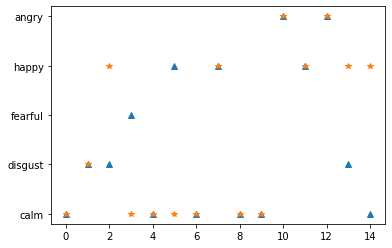

In [45]:
import matplotlib.pyplot as plt
plt.plot(y_test[0:15],'^')
plt.plot(y_pred[0:15],'*')


In [46]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 60.83%


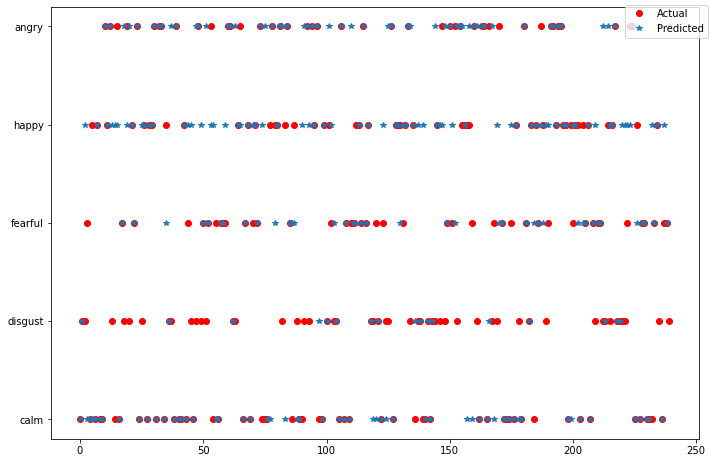

In [47]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1.5,1.5])
a1.plot(y_test, 'ro')
#a2 = a1.twinx()
a1.plot(y_pred,'*')
fig.legend(labels = ('Actual','Predicted'),loc='upper right')
plt.show()

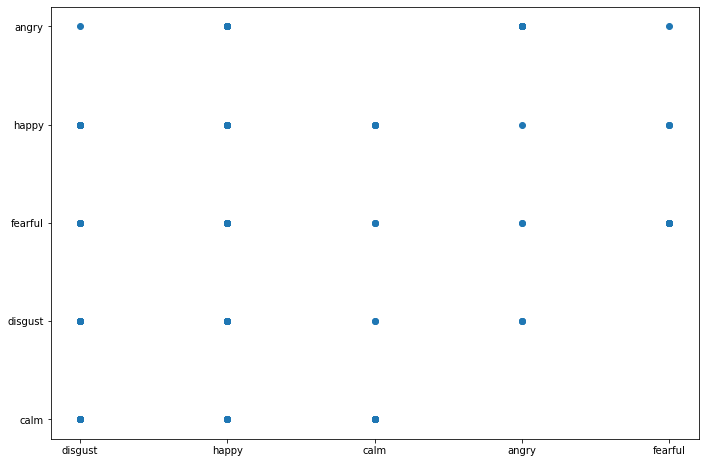

In [16]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1.5,1.5])
a1.scatter(y_pred,y_test)


In [56]:

from sklearn.metrics import confusion_matrix, classification_report

In [58]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[33  0  1  2  7]
 [ 1 43  2  2  6]
 [18  4 14  1 14]
 [ 1  5  0 25 12]
 [ 4  5  0  9 31]]


In [73]:
labels = np.asarray(observed_emotions)

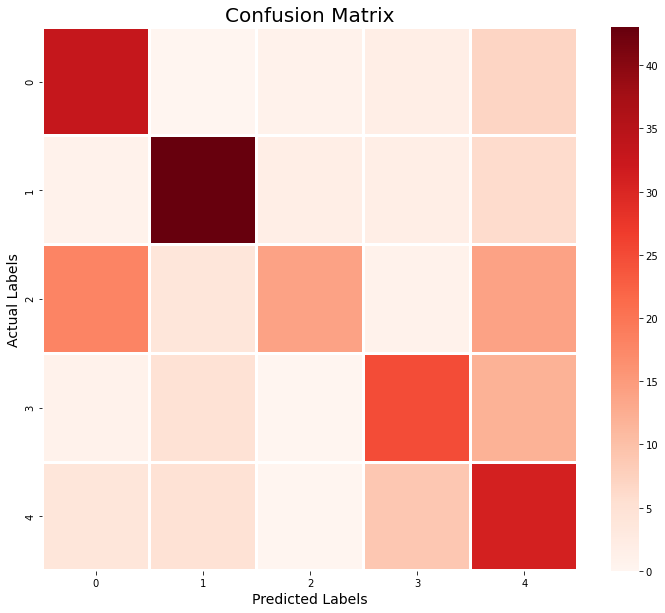

In [76]:
import seaborn as sns
cm = cf_matrix
plt.figure(figsize = (12, 10))
#cm = pd.DataFrame(index = [i for i in observed_emotions] , columns = [i for i in observed_emotions])
sns.heatmap(cm, linecolor='white', cmap='Reds', linewidth=2, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

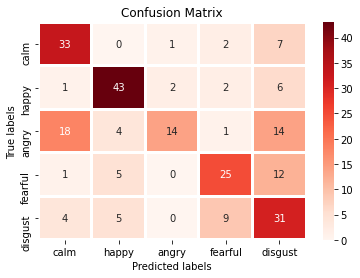

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(observed_emotions ); ax.yaxis.set_ticklabels(observed_emotions );

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.58      0.77      0.66        43
        calm       0.75      0.80      0.77        54
     disgust       0.82      0.27      0.41        51
     fearful       0.64      0.58      0.61        43
       happy       0.44      0.63      0.52        49

    accuracy                           0.61       240
   macro avg       0.65      0.61      0.60       240
weighted avg       0.65      0.61      0.60       240



IndexError: arrays used as indices must be of integer (or boolean) type

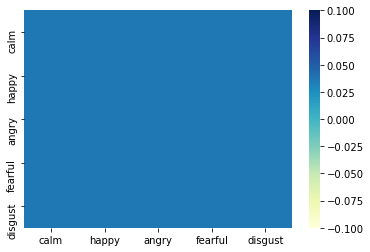

In [54]:
import seaborn as sns 
sns.heatmap(cm, annot=True,cmap="YlGnBu"),plt.title('HEATMAP')

In [55]:
y_test[0:30]

['calm',
 'disgust',
 'disgust',
 'fearful',
 'calm',
 'happy',
 'calm',
 'happy',
 'calm',
 'calm',
 'angry',
 'happy',
 'angry',
 'disgust',
 'calm',
 'angry',
 'calm',
 'fearful',
 'disgust',
 'angry',
 'disgust',
 'happy',
 'fearful',
 'angry',
 'calm',
 'disgust',
 'happy',
 'calm',
 'happy',
 'happy']

In [33]:
y_pred[0:30]

array(['calm', 'disgust', 'happy', 'fearful', 'calm', 'happy', 'calm',
       'happy', 'calm', 'calm', 'angry', 'happy', 'angry', 'happy',
       'happy', 'happy', 'calm', 'fearful', 'disgust', 'happy', 'fearful',
       'happy', 'fearful', 'angry', 'calm', 'happy', 'happy', 'calm',
       'happy', 'happy'], dtype='<U7')

In [34]:
y_test[0:15]==y_pred[0:15]

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False])

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
EXP: 

RAVDESS dataset
RAVDESS is one of the more common dataset used for this excercise by others. It's well liked because of its quality of speakers, recording and it has 24 actors of different genders. And there's more! You can get it in song format as well. There's something for everyone and their research project. So for convenience, here's the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel (01 = speech, 02 = song).
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

This means the meta data for the audio file is:

Video-only (02)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12) - Female (as the actor ID number is even)


In [35]:
import pandas as pd
RAV = 'D:/AAA_video_course/Programming/dataset/'
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_calm          96
male_happy         96
male_sad           96
male_angry         96
male_fear          96
male_disgust       96
male_surprise      96
female_calm        96
female_happy       96
female_sad         96
female_angry       96
female_fear        96
female_disgust     96
female_surprise    96
male_neutral       48
female_neutral     48
Name: labels, dtype: int64

In [1]:
#fearful 

import librosa.display
import IPython.display as ipd
RAV = 'D:/AAA_video_course/Programming/dataset/'

fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))

librosa.display.waveplot(data, sr=sampling_rate),plt.title('fearful')
ipd.Audio(fname)

NameError: name 'plt' is not defined

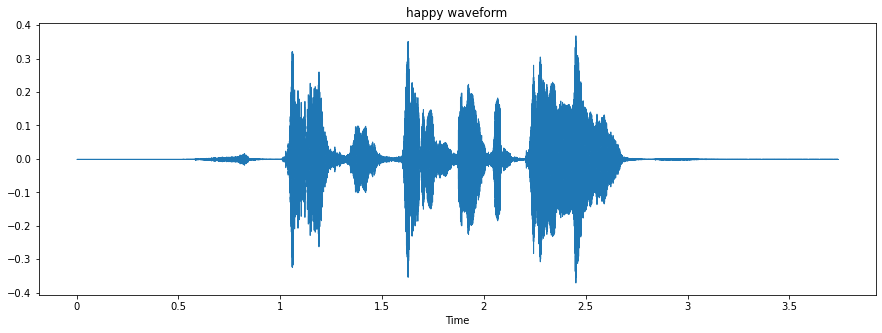

In [6]:
#happy
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate),plt.title('happy waveform')
ipd.Audio(fname)

In [38]:
audio = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'

#'Actor_14/03-01-02-02-02-02-14.wav' CALM

In [39]:

# importing required module

from playsound import playsound

from tkinter import*

root = Tk() 

root.title('Sound player')  #giving the title for our window

root.geometry("400x300")
 
# making function 

def play():

    playsound(audio)


title=Label(root,text="Emotion",bd=9,relief=GROOVE,

            font=("Ubuntu",50,"bold"),bg="white",fg="blue") 

title.pack(side=TOP,fill=X) 
 

play_button = Button(root, text="Play it", font=("Ubuntu", 32),

                     relief=GROOVE, command=play)

play_button.pack(pady=20)
 

info=Label(root,text="Click on the button above to play the audio file",

           font=("times new roman",10,"bold")).pack(pady=20)
root.mainloop()

In [ ]:
#test:


#TA = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'


myfile= input("Please enter the name of an audio file as follows: Actor_*num*/00-00-00-00-00-00-00.wav: ")

# EXAMPLE:   Actor_14/03-01-02-02-02-02-14.wav   calm
# Example2:  Actor_02/03-01-03-02-01-01-02.wav   happy
# Example3:  Actor_07/03-01-05-02-01-02-07.wav   angry
# Example4: Actor_21/03-01-06-02-01-01-21.wav    fear
# Example5: Actor_06/03-01-07-02-02-02-06.wav    disgust
# myexapmle: path: 


TA = RAV+myfile

#playing the sound

data, sampling_rate = librosa.load(TA)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
ipd.Audio(TA)

In [334]:
sampling_rate

22050

In [357]:
my_test=extract_feature(TA, mfcc=True, chroma=True, mel=True)
my_test = my_test.reshape(-1,180)
y_pred_afterplaying=model.predict(my_test)
y_pred_afterplaying[0]

'disgust'

In [4]:
#real-time recording and predicting:
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write

fs = 22050  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
write('C:/Users/AQ/Desktop/output.wav', fs, myrecording)

mypath = 'C:/Users/AQ/Desktop/output.wav'

data, sampling_rate = librosa.load(mypath)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
#ipd.Audio(mypath)

my_test=extract_feature(mypath, mfcc=True, chroma=True, mel=True)
my_test = my_test.reshape(-1,180)
y_pred_afterplaying=model.predict(my_test)
y_pred_afterplaying[0]

AttributeError: module 'librosa' has no attribute 'display'

<Figure size 1080x360 with 0 Axes>